In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import fbeta_score, recall_score, precision_score, roc_auc_score
from sklearn.ensemble import RandomForestRegressor, IsolationForest
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from scipy.stats import shapiro
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import chi2_contingency
from seaborn import clustermap
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
df = pd.read_csv('base_traitement_machine_learning (1).csv', delimiter = ',')

df.head()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


,mt_ope,nm_emt_nm_ben,nb_vir_recu_meme_compte,date_difference,nm_emt_nm_reel_ben,nm_ben_nm_reel_ben,fraude,date_creation_personne_physique,code_titre_de_civilite,annee_naissance,code_situation_de_famille,annee_debut_resident_bancaire,code_pcs_principale
0,30.0,0,3,-332,0,1,Non Fraude,1989-08-03T22:00:00.000Z,MLE,1966,1,1966,5200
1,1000.0,1,9,-348,1,1,Non Fraude,2001-09-05T22:00:00.000Z,MLE,2000,1,2000,8400
2,20.0,0,77,-599,0,0,Non Fraude,2019-09-19T22:00:00.000Z,MME,1989,6,2019,8200
3,10.0,1,20,-232,1,1,Non Fraude,2018-09-10T22:00:00.000Z,MME,1988,1,1988,5600
4,910.0,1,1,0,1,1,Non Fraude,2022-02-28T23:00:00.000Z,MR,2003,1,2022,8400


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17025 entries, 0 to 17024
Data columns (total 13 columns):
mt_ope                             17025 non-null float64
nm_emt_nm_ben                      17025 non-null int64
nb_vir_recu_meme_compte            17025 non-null int64
date_difference                    17025 non-null int64
nm_emt_nm_reel_ben                 17025 non-null int64
nm_ben_nm_reel_ben                 17025 non-null int64
fraude                             17025 non-null object
date_creation_personne_physique    17025 non-null object
code_titre_de_civilite             17025 non-null object
annee_naissance                    17025 non-null int64
code_situation_de_famille          17025 non-null int64
annee_debut_resident_bancaire      17025 non-null int64
code_pcs_principale                17025 non-null int64
dtypes: float64(1), int64(9), object(3)
memory usage: 1.7+ MB


In [3]:

# Transformation de la colonne Sexe, MR = 1 et MLE et MME = 0

col_mapping = {'MLE' : 0, 'MME' : 0, 'MR' : 1}

        
df["Sexe"] = df['code_titre_de_civilite'].map(col_mapping)


# On supprime la colonne création de la personne physique 

# creation colonne age et temps de resident bancaire 

df['age'] = 2024 - df['annee_naissance']
df['temps_resident_bancaire'] = 2024 - df['annee_debut_resident_bancaire']

# O supprime certaine colonnes que l'on ne souhaite pas garder
col_sup = ['annee_debut_resident_bancaire', 'annee_naissance', 'date_creation_personne_physique', 
           'code_titre_de_civilite', 'code_pcs_principale']

for col in col_sup : 
    df.drop(col, axis = 1, inplace = True)

df.head()

,mt_ope,nm_emt_nm_ben,nb_vir_recu_meme_compte,date_difference,nm_emt_nm_reel_ben,nm_ben_nm_reel_ben,fraude,code_situation_de_famille,Sexe,age,temps_resident_bancaire
0,30.0,0,3,-332,0,1,Non Fraude,1,0,58,58
1,1000.0,1,9,-348,1,1,Non Fraude,1,0,24,24
2,20.0,0,77,-599,0,0,Non Fraude,6,0,35,5
3,10.0,1,20,-232,1,1,Non Fraude,1,0,36,36
4,910.0,1,1,0,1,1,Non Fraude,1,1,21,2


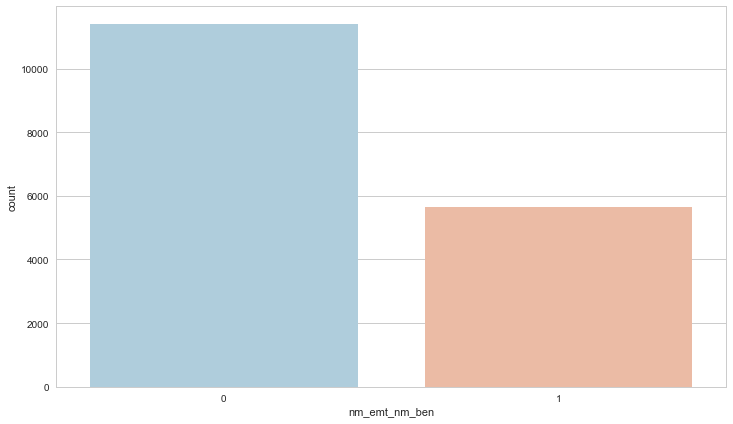

0    11388
1     5637
Name: nm_emt_nm_ben, dtype: int64


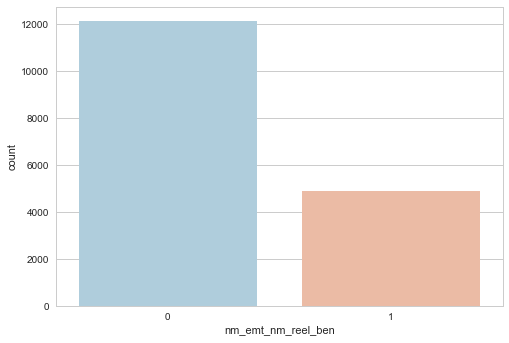

0    12135
1     4890
Name: nm_emt_nm_reel_ben, dtype: int64


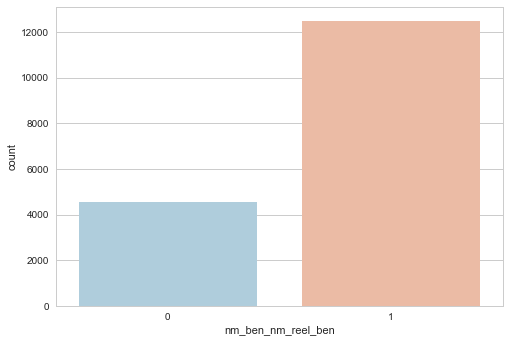

1    12478
0     4547
Name: nm_ben_nm_reel_ben, dtype: int64


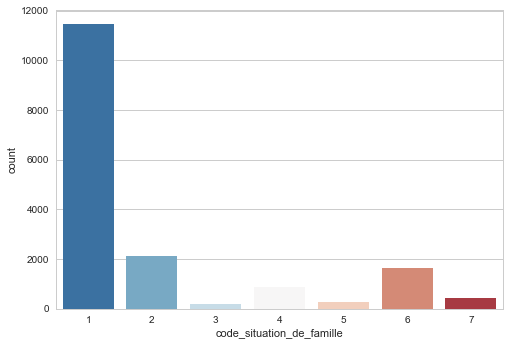

1    11460
2     2143
6     1652
4      882
7      426
5      280
3      182
Name: code_situation_de_famille, dtype: int64


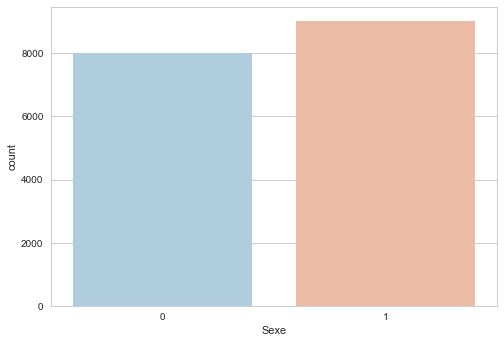

1    9020
0    8005
Name: Sexe, dtype: int64


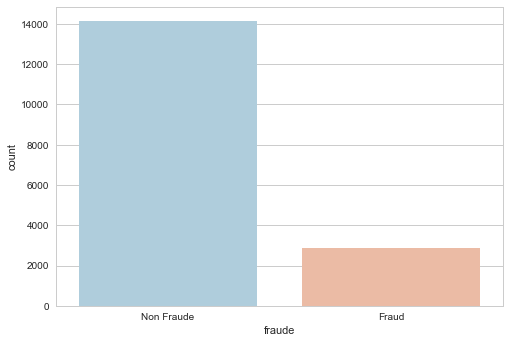

Non Fraude    14144
Fraud          2881
Name: fraude, dtype: int64


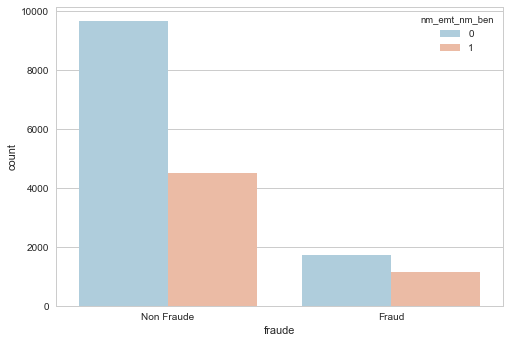

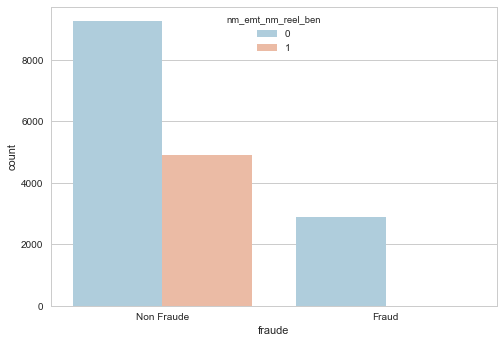

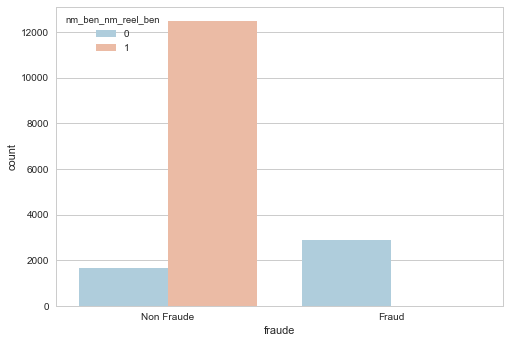

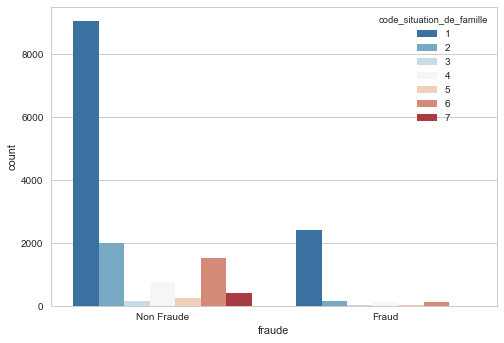

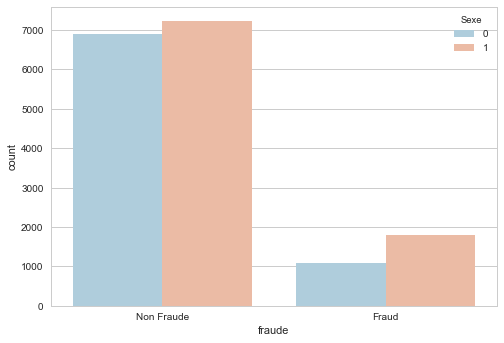

In [5]:
################################ STATISTIQUE DESCRIPTIVE ##############################

#### GRAPHIQUE DE COMPTAGE VAR CATEGORIELLE ####

var_cible = 'fraude'

var_cat = ['nm_emt_nm_ben', 'nm_emt_nm_reel_ben', 'nm_ben_nm_reel_ben', 'code_situation_de_famille', 'Sexe', var_cible]


# Histogramme de réprtitions pour l'ensemble des variables catégorielles

for i in var_cat:
    
    sns.set_style('whitegrid')
    sns.countplot(x=i, data=df, palette = 'RdBu_r')
    
    plt.show()
    
    print(df[i].value_counts())

    
    
# Graphique de comptage en filtré par variables catégorielles
for i in var_cat:
    if i != var_cible:
        sns.countplot(x=var_cible, hue=i, data=df, palette = 'RdBu_r')
        plt.show()

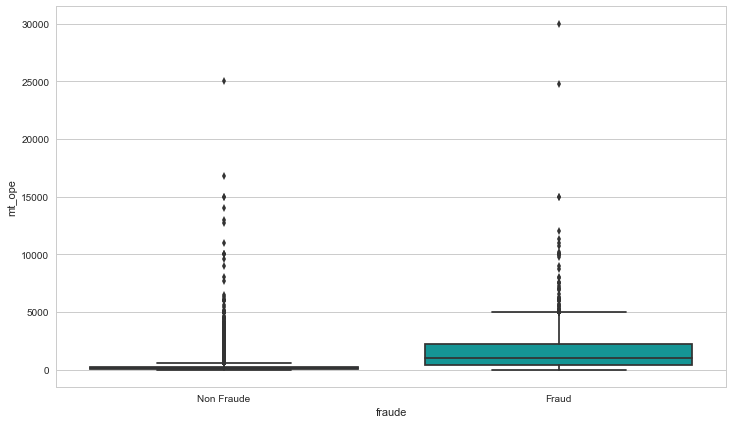

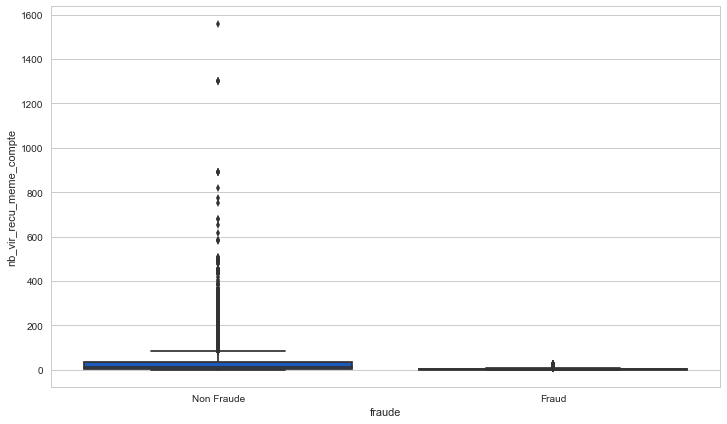

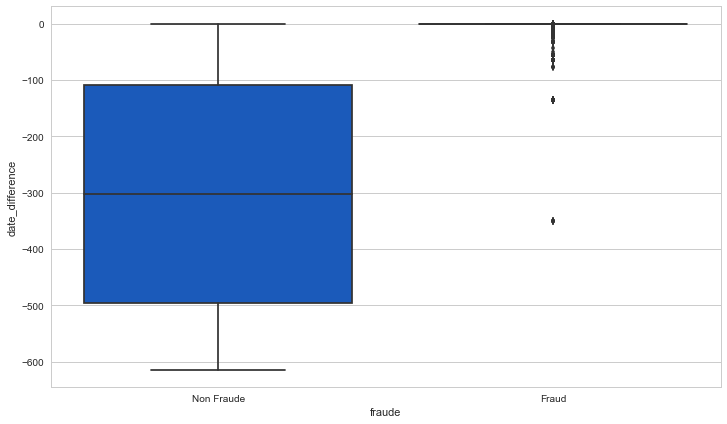

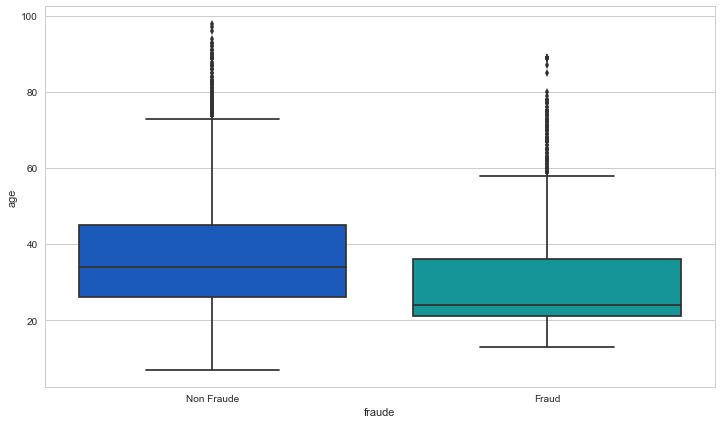

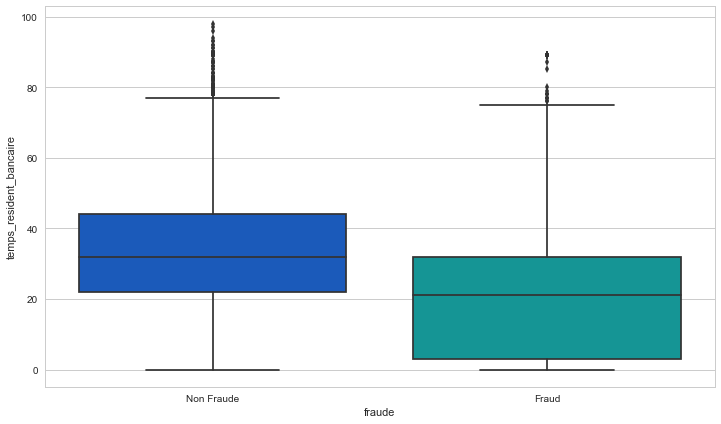

In [6]:
### BOITE A MOUSTACHE ###

var_num = ['mt_ope', 'nb_vir_recu_meme_compte', 'date_difference','age', 'temps_resident_bancaire']


for j in var_num:
    plt.figure(figsize=(12, 7))
    sns.boxplot(x=var_cible, y = j, data = df, palette = 'winter')
    plt.show()
    

    # On sépare les données en 2 groupes en fonction de la variable "fumeur".

    Non_fraude = df[df[var_cible]==0][j]
    Fraude = df[df[var_cible]==1][j]
    
    Non_fraude.describe()
    Fraude.describe()

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook.py:136: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


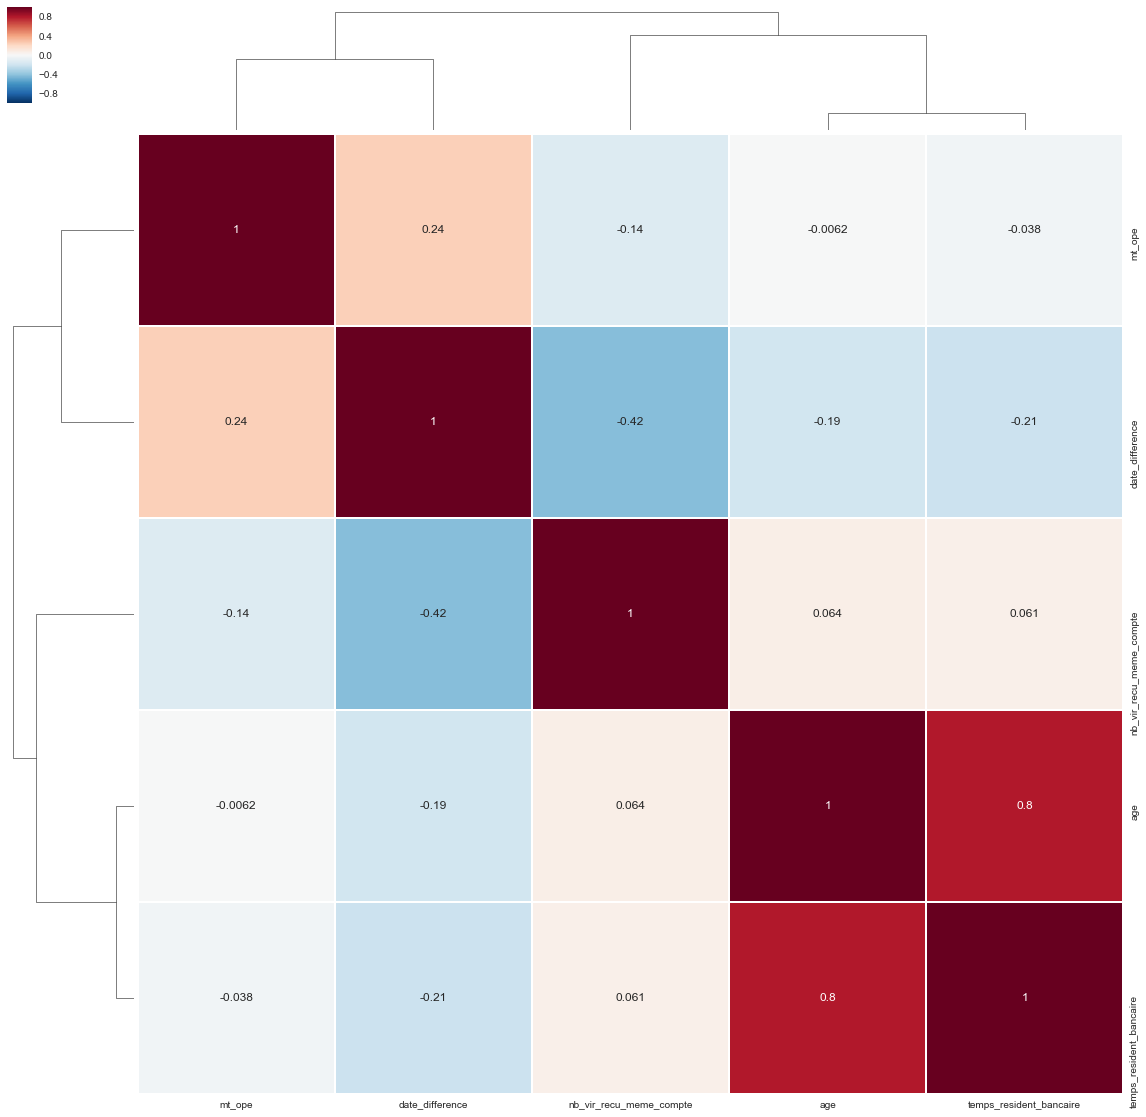

In [7]:
### MATRICE CORRELATION VAR NUMERIQUES ###


corr= df[var_num].corr()
clustermap(corr, center = 0, linewidths=0.75, figsize=(20, 20), annot=True)

plt.show()

# On constate que person_age est très corrélé avec la variable cb_person_cred_hist_length on décide donc de supprimer
# la var cb_person_cred_hist_length pour éviter les problèmes d'autocorrélation des variables. De plus graphiquement,
# avec les boites à moustaches, cette variable ne semble pas discriminate. 



In [8]:
# ENCODAGE DE MA VARIABLE CIBLE 

# Transformation de la colonne Sexe, MR = 1 et MLE et MME = 0

col_mapping = {'Non Fraude' : 0, 'Fraud' : 1}

        
df["fraude"] = df['fraude'].map(col_mapping)


In [9]:
#### TEST DE STUDENT ### 

# Quelles variables numériques ont un réel impact sur ma variable à classifier : 

print('TEST DE STUDENT\n')
for i in var_num : 

    # On sépare les données en 2 groupes en fonction de la variable "fumeur".

    groupe_0 = df[df[var_cible]==0][i]
    groupe_1 = df[df[var_cible]==1][i]

    # Effectuer le test t de Student

    t_stat, p_value, _ =sm.stats.ttest_ind(groupe_0, groupe_1)

    print('test student sur variable', i, '\n ', 'sat de test : ', t_stat, '\n p_value : ' , p_value, '\n')

# Toute les test de student ont une p_value <= 0,05 donc toute les var numériques sont discriminate pour la classification de la
# var cible, ainsi dans notre modèle, on garde toute les variables quantitatives séléctionnées.


### TEST CHI 2 ###

# Creation d'une table de contingence
print('TEST CHI 2\n')
for i in var_cat : 
    if i != var_cible :

        contingency_table = pd.crosstab(df[var_cible], df[i])
        print(contingency_table, '\n')

        #Effectuer le test de Chi 2

        khi2, pval , ddl , contingent_theorique = chi2_contingency(contingency_table)

        print('test chi 2 sur variable', i , '\n ', 'sat de test : ', khi2, '\n p_value : ' , pval, '\n')

# Tous les test de Chi 2 ont également une p_value <= 0,05, alors on garde ces variables qualitatives dans notre analyse.

TEST DE STUDENT

test student sur variable mt_ope 
  sat de test :  -66.9257095124 
 p_value :  0.0 

test student sur variable nb_vir_recu_meme_compte 
  sat de test :  25.7907325158 
 p_value :  6.46492077929e-144 

test student sur variable date_difference 
  sat de test :  -76.7782721142 
 p_value :  0.0 

test student sur variable age 
  sat de test :  22.0841513931 
 p_value :  1.40280479978e-106 

test student sur variable temps_resident_bancaire 
  sat de test :  26.6633946193 
 p_value :  1.74985620041e-153 

TEST CHI 2

nm_emt_nm_ben     0     1
fraude                   
0              9650  4494
1              1738  1143 

test chi 2 sur variable nm_emt_nm_ben 
  sat de test :  67.0996645319 
 p_value :  2.58122326479e-16 

nm_emt_nm_reel_ben     0     1
fraude                        
0                   9254  4890
1                   2881     0 

test chi 2 sur variable nm_emt_nm_reel_ben 
  sat de test :  1395.73259304 
 p_value :  1.77724238994e-305 

nm_ben_nm_reel_ben  

In [10]:
new_df = df.copy()

In [11]:
new_df.mt_ope.describe()

count    17025.000000
mean       496.135545
std       1031.281633
min          0.010000
25%         35.000000
50%        104.000000
75%        500.000000
max      30000.000000
Name: mt_ope, dtype: float64

In [12]:
############################ NORMALISATION DES VARIABLES QUANTI ##############################

# Normalisation des données
# On verifie avec des test statistiques quelles méthode de normalisation utiliser : 
scaler_MinMax = MinMaxScaler()
scaler_Standard = StandardScaler()

for colonne in var_num :
    stat, p_value = shapiro(df[colonne])
    
    # Interpréter les résultats
    alpha = 0.05  # Niveau de signification
    
    if p_value > alpha:
        print("Les données ", colonne ," semblent être tirées d'une distribution normale (p-value =", p_value, ")")
        colonne_data = new_df[colonne].values.reshape(-1, 1)
        # Normalisation des données méthode Stabdard
        new_df[colonne] = scaler_Standard.fit_transform(colonne_data)
        
    else:
        print("Les données ", colonne ," ne semblent pas être tirées d'une distribution normale (p-value =", p_value, ")")
        colonne_data = new_df[colonne].values.reshape(-1, 1)
        #Normalisation des données méthode MinMax
        new_df[colonne] = scaler_MinMax.fit_transform(colonne_data)

Les données  mt_ope  ne semblent pas être tirées d'une distribution normale (p-value = 0.0 )
Les données  nb_vir_recu_meme_compte  ne semblent pas être tirées d'une distribution normale (p-value = 0.0 )
Les données  date_difference  ne semblent pas être tirées d'une distribution normale (p-value = 0.0 )
Les données  age  ne semblent pas être tirées d'une distribution normale (p-value = 0.0 )
Les données  temps_resident_bancaire  ne semblent pas être tirées d'une distribution normale (p-value = 0.0 )


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1326: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, _DataConversionWarning)


In [13]:
new_df.head()

,mt_ope,nm_emt_nm_ben,nb_vir_recu_meme_compte,date_difference,nm_emt_nm_reel_ben,nm_ben_nm_reel_ben,fraude,code_situation_de_famille,Sexe,age,temps_resident_bancaire
0,0.001000,0,0.001283,0.459283,0,1,0,1,0,0.560440,0.591837
1,0.033333,1,0.005131,0.433225,1,1,0,1,0,0.186813,0.244898
2,0.000666,0,0.048749,0.024430,0,0,0,6,0,0.307692,0.051020
3,0.000333,1,0.012187,0.622150,1,1,0,1,0,0.318681,0.367347
4,0.030333,1,0.000000,1.000000,1,1,0,1,1,0.153846,0.020408


In [14]:
############################## PARTIE MODELISATION ###############################

#### SEPARER LES DATA EN TRAIN ET TEST ####

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(new_df.drop([var_cible], axis = 1),
                                                    new_df[var_cible], test_size = 0.30,
                                                    random_state = 50)

In [28]:
### CREATION DICTIONNAIRE DES PREDICTIONS ####

df_models_pred = pd.DataFrame(columns = ['Modele', 'Accuracy', 'Precision', 'Recall', 'Score_F1'])

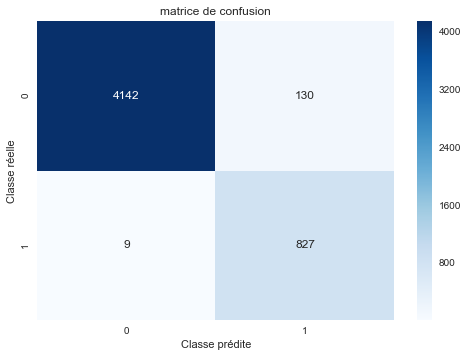

Accuracy                          0.972787783868
Precision modèle (accuracy)       0.864158829676
Recall                            0.989234449761
Score f1                          0.922476296709


In [29]:
#### REGRESSION LOGISTIQUE ####

from sklearn.linear_model import LogisticRegression

logmodel = LogisticRegression(solver = 'liblinear')

# Entrainement du  model
logmodel.fit(X_train, y_train)

# Evaluation du modèle
log_pred = logmodel.predict(X_test)


from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_test, log_pred)



sns.heatmap(cnf_matrix, annot = True, cmap = 'Blues', fmt ='g')
plt.xlabel('Classe prédite')
plt.ylabel('Classe réelle')
plt.title('matrice de confusion')
plt.show()

from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# Calcul des metriques
accuracy = accuracy_score(y_test, log_pred)
precision_modele = precision_score(y_test, log_pred)
recall_logistic = recall_score(y_test, log_pred)
f1_logistic = f1_score(y_test, log_pred)

df_models_pred = df_models_pred.append({'Modele' : 'RegLog',
                                          'Accuracy' : round(accuracy, 4),
                                          'Precision' : round(precision_modele, 4),
                                          'Recall' : round(recall_logistic,4),
                                          'Score_F1' : round(f1_logistic, 4)}, ignore_index = True)

print('Accuracy                         ', accuracy)
print('Precision modèle (accuracy)      ', precision_modele)
print('Recall                           ', recall_logistic)
print('Score f1                         ', f1_logistic)



Accuracy                          0.985904463587
Precision modèle                  0.953681710214
Recall                            0.960526315789
Score f1                          0.957091775924


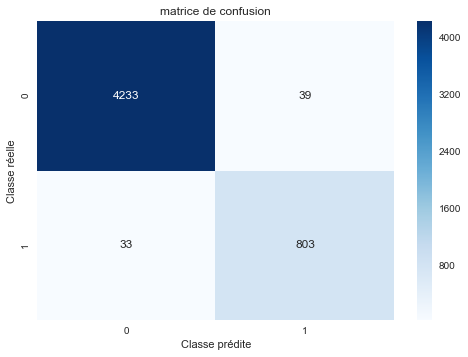

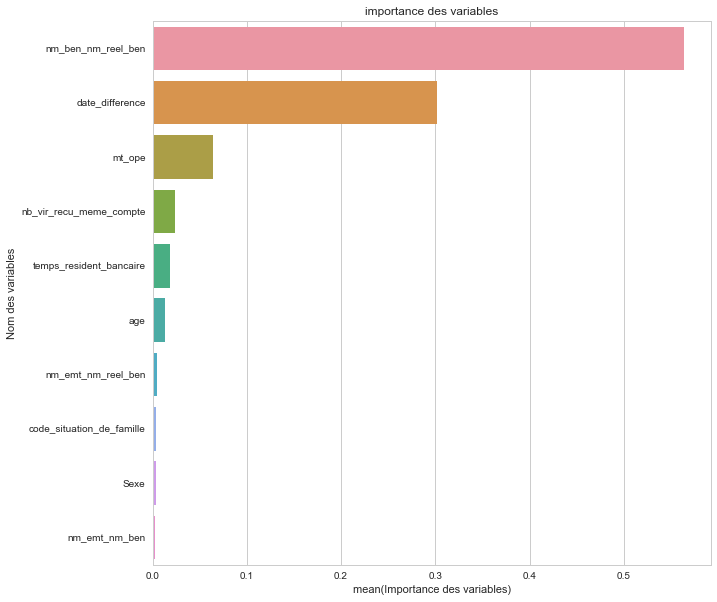

In [30]:
##### ARBRE DE DECISION #####


# Création d'un algorithme d'arbre de decision 

from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()

clf.fit(X_train, y_train)

arbre_decision_pred = clf.predict(X_test)


# Calcul métriques modèle d'arbre de décision

from sklearn.metrics import precision_score, recall_score, f1_score

# Calcul des metriques
accuracy = accuracy_score(y_test, arbre_decision_pred)
precision_modele = precision_score(y_test, arbre_decision_pred)
recall_logistic = recall_score(y_test, arbre_decision_pred)
f1_logistic = f1_score(y_test, arbre_decision_pred)

df_models_pred = df_models_pred.append({'Modele' : 'Arbre_decision',
                                          'Accuracy' : round(accuracy, 4),
                                          'Precision' : round(precision_modele, 4),
                                          'Recall' : round(recall_logistic,4),
                                          'Score_F1' : round(f1_logistic, 4)}, ignore_index = True)

print('Accuracy                         ', accuracy)
print('Precision modèle                 ', precision_modele)
print('Recall                           ', recall_logistic)
print('Score f1                         ', f1_logistic)


from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_test, arbre_decision_pred)



sns.heatmap(cnf_matrix, annot = True, cmap = 'Blues', fmt ='g')
plt.xlabel('Classe prédite')
plt.ylabel('Classe réelle')
plt.title('matrice de confusion')
plt.show()

# Importance des variables dans notre modèle : 

feat_imp_df = pd.DataFrame(data = {"Nom des variables" : X_train.columns, 
                                  "Importance des variables" : clf.feature_importances_})
feat_imp_df = feat_imp_df.sort_values("Importance des variables", ascending = False)[:]

fig,ax = plt.subplots(figsize = (10,10))
ax = sns.barplot(x = 'Importance des variables', y = 'Nom des variables', data = feat_imp_df.sort_values("Importance des variables",
                     ascending = False)[:15])
plt.title('importance des variables')
plt.show()

Accuracy                          0.98942834769
Precision                         0.966587112172
Recall                            0.968899521531
Score f1                          0.967741935484


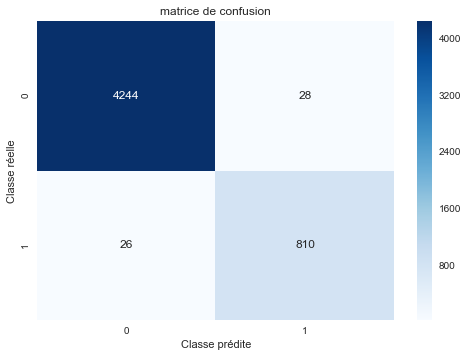

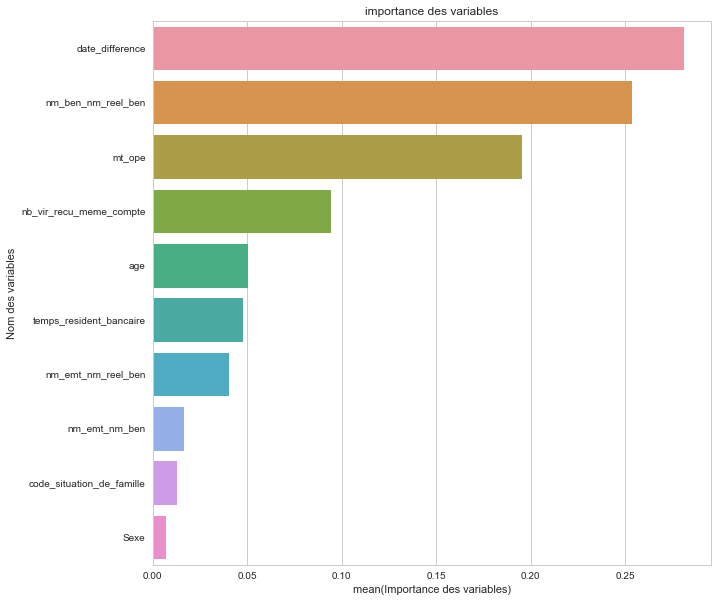

In [31]:
#### GRADIENT BOOSTING ####

#Test du modèle Gradient Boosting

from sklearn.ensemble import GradientBoostingClassifier

GBC = GradientBoostingClassifier(n_estimators = 100, random_state = 42)

GBC.fit(X_train, y_train)

GBC_pred = GBC.predict(X_test)


accuracy = accuracy_score(y_test, GBC_pred)
precision_modele = precision_score(y_test, GBC_pred)
recall_logistic = recall_score(y_test, GBC_pred)
f1_logistic = f1_score(y_test, GBC_pred)

df_models_pred = df_models_pred.append({'Modele' : 'GBC',
                                          'Accuracy' : round(accuracy, 4),
                                          'Precision' : round(precision_modele, 4),
                                          'Recall' : round(recall_logistic,4),
                                          'Score_F1' : round(f1_logistic, 4)}, ignore_index = True)

print('Accuracy                         ', accuracy)
print('Precision                        ', precision_modele)
print('Recall                           ', recall_logistic)
print('Score f1                         ', f1_logistic)

from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_test, GBC_pred)

sns.heatmap(cnf_matrix, annot = True, cmap = 'Blues', fmt ='g')
plt.xlabel('Classe prédite')
plt.ylabel('Classe réelle')
plt.title('matrice de confusion')
plt.show()

# Importance des variables dans notre modèle : 

feat_imp_df = pd.DataFrame(data = {"Nom des variables" : X_train.columns, 
                                  "Importance des variables" : GBC.feature_importances_})
feat_imp_df = feat_imp_df.sort_values("Importance des variables", ascending = False)[:]

fig,ax = plt.subplots(figsize = (10,10))
ax = sns.barplot(x = 'Importance des variables', y = 'Nom des variables', data = feat_imp_df.sort_values("Importance des variables",
                     ascending = False)[:15])
plt.title('importance des variables')
plt.show()

Accuracy                          0.990602975724
Precision                         0.967933491686
Recall                            0.974880382775
Score f1                          0.971394517282


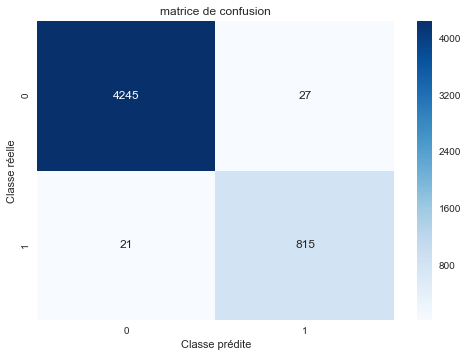

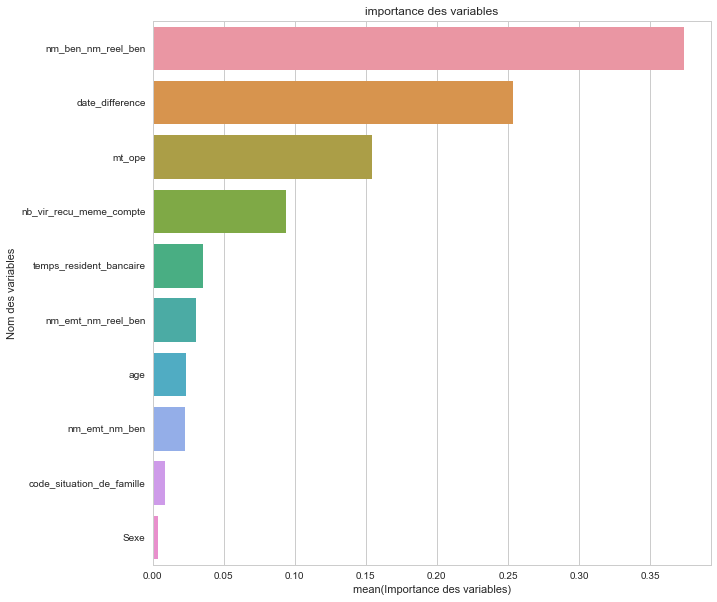

In [32]:
#### RANDOM FOREST ####


# Creation d'un random forest

from sklearn.ensemble import RandomForestClassifier

rdf = RandomForestClassifier(n_estimators = 100, random_state = 42)

rdf.fit(X_train, y_train)

RDF_pred = rdf.predict(X_test)


accuracy = accuracy_score(y_test, RDF_pred)
precision_modele = precision_score(y_test, RDF_pred)
recall_logistic = recall_score(y_test, RDF_pred)
f1_logistic = f1_score(y_test, RDF_pred)

df_models_pred = df_models_pred.append({'Modele' : 'Random_Forest',
                                          'Accuracy' : round(accuracy, 4),
                                          'Precision' : round(precision_modele, 4),
                                          'Recall' : round(recall_logistic,4),
                                          'Score_F1' : round(f1_logistic, 4)}, ignore_index = True)

print('Accuracy                         ', accuracy)
print('Precision                        ', precision_modele)
print('Recall                           ', recall_logistic)
print('Score f1                         ', f1_logistic)

from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_test, RDF_pred)

sns.heatmap(cnf_matrix, annot = True, cmap = 'Blues', fmt ='g')
plt.xlabel('Classe prédite')
plt.ylabel('Classe réelle')
plt.title('matrice de confusion')
plt.show()

# Importance des variables dans notre modèle : 

feat_imp_df = pd.DataFrame(data = {"Nom des variables" : X_train.columns, 
                                  "Importance des variables" : rdf.feature_importances_})
feat_imp_df = feat_imp_df.sort_values("Importance des variables", ascending = False)[:]

fig,ax = plt.subplots(figsize = (10,10))
ax = sns.barplot(x = 'Importance des variables', y = 'Nom des variables', data = feat_imp_df.sort_values("Importance des variables",
                     ascending = False)[:15])
plt.title('importance des variables')
plt.show()

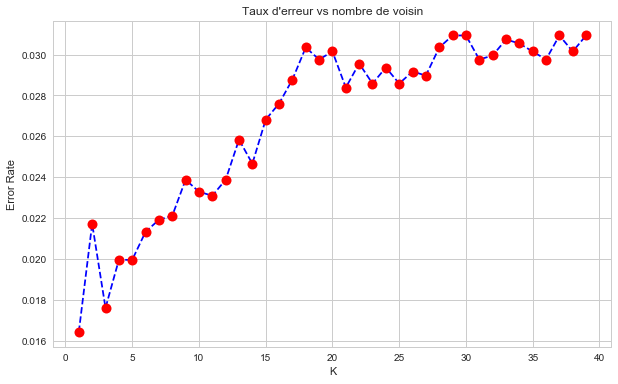

In [24]:
############## K PLUS PROCHE VOISINS ##################

import numpy as np

erreurs = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    erreurs.append(np.mean(pred_i != y_test))
    
plt.figure(figsize = (10, 6))
plt.plot(range(1,40), erreurs, color = "blue", linestyle = 'dashed', marker = 'o', markerfacecolor = 'red', markersize = 10)
plt.title("Taux d'erreur vs nombre de voisin")
plt.xlabel("K")
plt.ylabel("Error Rate")

plt.show()

Accuracy                          0.978073610023
Precision                         0.910430839002
Recall                            0.960526315789
Score f1                          0.934807916182


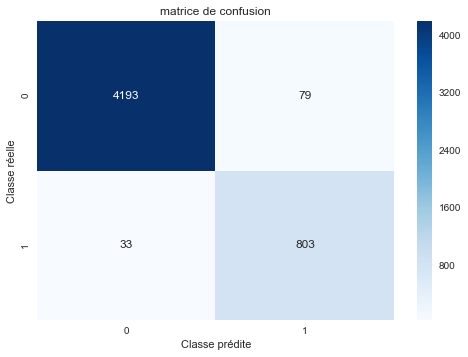

In [33]:
##### K plus proche voisin sélection de K avec graph #####

# On prend K = 7 car c'est l'endroit ou il semble y avoir le plus de stabilité et ou l'erreur est faible 

KnnS = knn = KNeighborsClassifier(n_neighbors=7) # Création de notre KNN 

KnnS.fit(X_train, y_train)

KnnS_pred = KnnS.predict(X_test)


accuracy = accuracy_score(y_test, KnnS_pred)
precision_modele = precision_score(y_test, KnnS_pred)
recall_logistic = recall_score(y_test, KnnS_pred)
f1_logistic = f1_score(y_test, KnnS_pred)

df_models_pred = df_models_pred.append({'Modele' : 'KNN',
                                          'Accuracy' : round(accuracy, 4),
                                          'Precision' : round(precision_modele, 4),
                                          'Recall' : round(recall_logistic,4),
                                          'Score_F1' : round(f1_logistic, 4)}, ignore_index = True)

print('Accuracy                         ', accuracy)
print('Precision                        ', precision_modele)
print('Recall                           ', recall_logistic)
print('Score f1                         ', f1_logistic)

from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_test, KnnS_pred)

sns.heatmap(cnf_matrix, annot = True, cmap = 'Blues', fmt ='g')
plt.xlabel('Classe prédite')
plt.ylabel('Classe réelle')
plt.title('matrice de confusion')
plt.show()

In [34]:
#### SELECTION DU MODELE #####

# Le modele de Foret aleatoire semble le meilleur en raison des metrics

df_models_pred.head(10)


,Modele,Accuracy,Precision,Recall,Score_F1
0,RegLog,0.9728,0.8642,0.9892,0.9225
1,Arbre_decision,0.9859,0.9537,0.9605,0.9571
2,GBC,0.9894,0.9666,0.9689,0.9677
3,Random_Forest,0.9906,0.9679,0.9749,0.9714
4,KNN,0.9781,0.9104,0.9605,0.9348


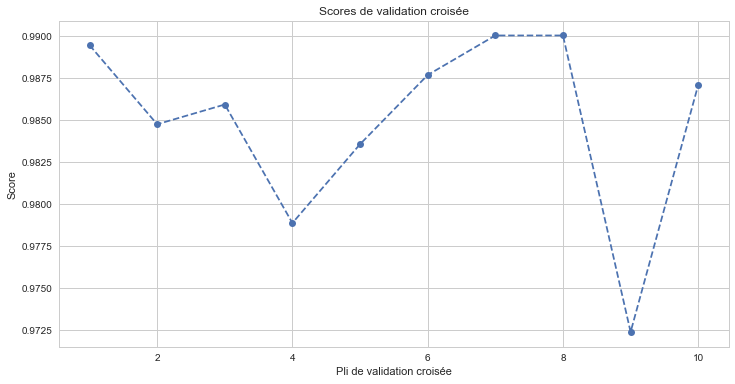

In [35]:
###### VERIFICATION DU SURAPPRENTISSAGE #######

# Validation croiséé pour le modèle RDF
from sklearn.model_selection import cross_val_score

scores = cross_val_score(rdf, new_df.drop([var_cible], axis = 1),
                                                    new_df[var_cible], cv=10)

# Tracer les scores
plt.figure(figsize=(12, 6))
plt.plot(np.arange(1, 11), scores, marker='o', linestyle='--')
plt.title('Scores de validation croisée')
plt.xlabel('Pli de validation croisée')
plt.ylabel('Score')
plt.grid(True)
plt.show()

In [36]:

### PREDICTION DES PROBABILITES ###

# On va predire les probabilités de non remboursement sur l'ensemble de test :

base_verif_proba = X_test.copy()

proba = rdf.predict_proba(X_test)[:, 1]

# Ajout des probas au dataframe de test
base_verif_proba['Proba_defaut'] = proba

# Ajout de valeurs réelles pour comparer 
base_verif_proba['defaut_paiement'] = y_test.values

# Création d'un score associée aux probabilités 
import numpy as np

score = []

for i in range(0,len(base_verif_proba)):
    
    if base_verif_proba.iat[i,10] < 0.2 :
        score.append(5)
        
    elif  0.4 > base_verif_proba.iat[i,10] >= 0.2 :
        score.append(4)
        
    elif 0.6 > base_verif_proba.iat[i,10] >= 0.4 :
        score.append(3)
        
    elif 0.8 > base_verif_proba.iat[i,10] >= 0.6 :
        score.append(2)
        
    elif base_verif_proba.iat[i,10] >= 0.8 :
        score.append(1)

base_verif_proba['SCORE'] = score

base_verif_proba.head()

,mt_ope,nm_emt_nm_ben,nb_vir_recu_meme_compte,date_difference,nm_emt_nm_reel_ben,nm_ben_nm_reel_ben,code_situation_de_famille,Sexe,age,temps_resident_bancaire,Proba_defaut,defaut_paiement,SCORE
591,0.048011,0,0.001924,0.708469,0,1,1,1,0.351648,0.397959,0.00,0,5
6512,0.001000,0,0.000641,0.998371,0,0,2,0,0.175824,0.030612,0.75,1,2
177,0.000466,1,0.027582,0.174267,1,1,4,0,0.626374,0.653061,0.00,0,5
6539,0.016666,0,0.008339,0.574919,0,1,6,0,0.703297,0.724490,0.00,0,5
12904,0.000333,0,0.000000,1.000000,0,1,1,1,0.131868,0.193878,0.00,0,5


In [37]:
contingency_table = pd.crosstab(base_verif_proba['defaut_paiement'], base_verif_proba['SCORE'])
print(contingency_table, '\n')

SCORE              1   2   3   4     5
defaut_paiement                       
0                 12   9  18  30  4203
1                778  27  18   8     5 



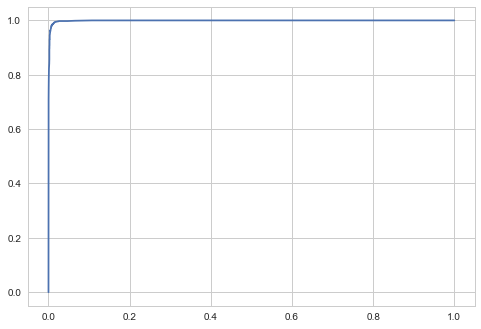

AUC :  0.998990309661


In [38]:
###### COURBE ROC ET AUC POUR DETERMINER LA QUALITE DE MON MODELE ######

from sklearn.metrics import roc_curve, roc_auc_score
fpr, tpr, thresholds = roc_curve(y_test, proba)
plt.plot(fpr, tpr)
plt.show()

test_auc_roc = roc_auc_score(y_test, proba)
print('AUC : ', test_auc_roc)